# Melhores resultados na base credits

<ul>
    <li>Árvore de decisão: 98.20</li>
    <li>Random forest: 98.40</li>
    <li>Regras: 97.40</li>
    <li>KNN: 98.60</li>
    <li>Regressão logística: 94.60</li>
    <li>SVM: 98.80</li>
    <li>Redes neurais: 99.60</li>
</ul>

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import shapiro

In [12]:
import pickle
with open('../dataset/credits.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [13]:
x_credit_treinamento.shape, y_credit_treinamento.shape, x_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [14]:
x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis = 0)
x_credit.shape

(2000, 3)

In [15]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

## GRID SEARCH DECISION TREE


In [16]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


# Random forest

In [17]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
0.9865


KNN

In [18]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


# Regressão logística


In [19]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


# SVM

In [20]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


# Redes neurais

In [21]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [8, 10, 30, 56]}

grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

{'activation': 'relu', 'batch_size': 8, 'solver': 'adam'}
0.9970000000000001


## VALIDAÇÃO CRUZADA

In [22]:
from sklearn.model_selection import cross_val_score, KFold

In [23]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
    print(i)
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, x_credit, y_credit, cv = kfold)
    #print(scores)
    #print(scores.mean())
    resultados_arvore.append(scores.mean())

    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)
    scores = cross_val_score(random_forest, x_credit, y_credit, cv=kfold)
    resultados_random_forest.append(scores.mean())

    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, x_credit, y_credit, cv=kfold)
    resultados_knn.append(scores.mean())

    logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
    scores = cross_val_score(logistica, x_credit, y_credit, cv=kfold)
    resultados_logistica.append(scores.mean())

    svm = SVC(kernel='rbf', C=2.0)
    scores = cross_val_score(svm, x_credit, y_credit, cv=kfold)
    resultados_svm.append(scores.mean())

    rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
    scores = cross_val_score(rede_neural, x_credit, y_credit, cv=kfold)
    resultados_rede_neural.append(scores.mean())


0


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

1


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

2


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

3


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

4


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

5


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

6


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

7


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

8


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

9


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

10


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

11


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

12


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

13


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

14


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

15


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

16


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

17


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

18


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

19


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

20


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

21


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

22


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

23


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

24


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

25


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

26


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

27


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

28


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

29


c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

In [24]:
resultados_arvore, resultados_random_forest

([0.986,
  0.9844999999999999,
  0.9905000000000002,
  0.9875,
  0.9879999999999999,
  0.9890000000000001,
  0.9884999999999999,
  0.9875,
  0.9855,
  0.9875,
  0.9860000000000001,
  0.9894999999999999,
  0.9889999999999999,
  0.9869999999999999,
  0.9845,
  0.9854999999999998,
  0.9855,
  0.9904999999999999,
  0.9875,
  0.9869999999999999,
  0.983,
  0.9870000000000001,
  0.9884999999999999,
  0.9875,
  0.9870000000000001,
  0.9880000000000001,
  0.9879999999999999,
  0.986,
  0.986,
  0.9875],
 [0.983,
  0.983,
  0.986,
  0.986,
  0.983,
  0.9869999999999999,
  0.9855,
  0.9855,
  0.9874999999999998,
  0.985,
  0.9825000000000002,
  0.986,
  0.9834999999999999,
  0.9809999999999999,
  0.9845,
  0.983,
  0.983,
  0.9855,
  0.9855,
  0.9855,
  0.9854999999999998,
  0.9835,
  0.9854999999999998,
  0.9834999999999999,
  0.9855,
  0.986,
  0.9814999999999999,
  0.9824999999999999,
  0.9799999999999999,
  0.9844999999999999])

In [25]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random Forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

,Arvore,Random Forest,KNN,Logistica,SVM,Rede neural
0,0.9860,0.9830,0.9815,0.9475,0.9845,0.9960
1,0.9845,0.9830,0.9800,0.9465,0.9840,0.9975
2,0.9905,0.9860,0.9795,0.9470,0.9865,0.9970
3,0.9875,0.9860,0.9780,0.9460,0.9850,0.9975
4,0.9880,0.9830,0.9820,0.9465,0.9850,0.9975
5,0.9890,0.9870,0.9780,0.9465,0.9845,0.9975
6,0.9885,0.9855,0.9805,0.9470,0.9860,0.9965
7,0.9875,0.9855,0.9800,0.9480,0.9850,0.9975
8,0.9855,0.9875,0.9795,0.9465,0.9840,0.9970
9,0.9875,0.9850,0.9820,0.9465,0.9845,0.9970


In [26]:
resultados.describe()

,Arvore,Random Forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987167,0.984317,0.980050,0.946950,0.985083,0.997083
std,0.001724,0.001812,0.001533,0.000687,0.001280,0.000437
min,0.983000,0.980000,0.977000,0.945500,0.982000,0.996000
25%,0.986000,0.983000,0.979000,0.946500,0.984125,0.997000
50%,0.987500,0.984750,0.980000,0.947000,0.985000,0.997000
75%,0.988000,0.985500,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.987500,0.982500,0.948500,0.987500,0.998000


In [27]:
resultados.var()

Arvore           2.971264e-06
Random Forest    3.284195e-06
KNN              2.350862e-06
Logistica        4.715517e-07
SVM              1.639368e-06
Rede neural      1.910920e-07
dtype: float64

In [28]:
(resultados.std() / resultados.mean() * 100)

Arvore           0.174614
Random Forest    0.184111
KNN              0.156446
Logistica        0.072517
SVM              0.129977
Rede neural      0.043842
dtype: float64

## TESTE DE NORMALIDADE

In [29]:
alpha = 0.05
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.9758147597312927, pvalue=0.7067294120788574),
 ShapiroResult(statistic=0.9398916363716125, pvalue=0.09034959971904755),
 ShapiroResult(statistic=0.9584025144577026, pvalue=0.28181397914886475),
 ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786),
 ShapiroResult(statistic=0.9622980356216431, pvalue=0.354146808385849),
 ShapiroResult(statistic=0.8873639702796936, pvalue=0.004180221352726221))

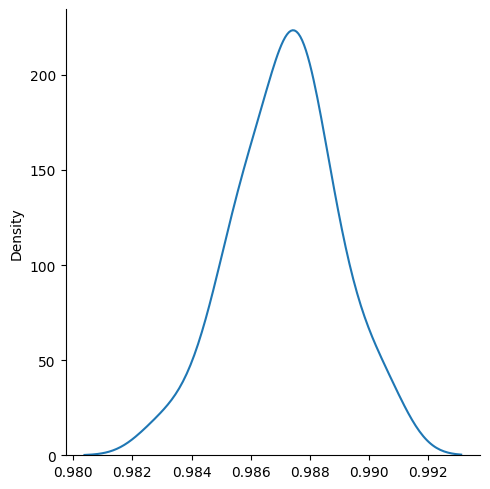

In [30]:
sns.displot(resultados_arvore, kind = 'kde');

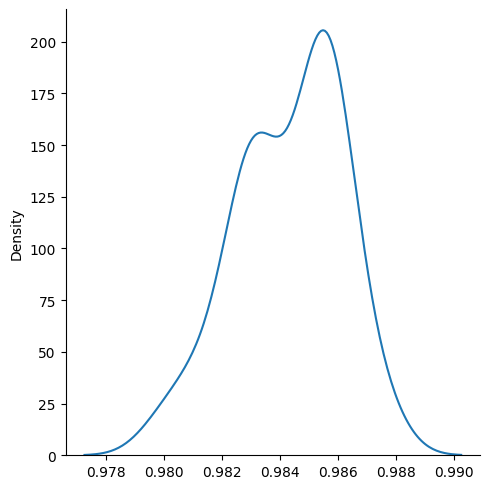

In [31]:
sns.displot(resultados_random_forest, kind = 'kde');

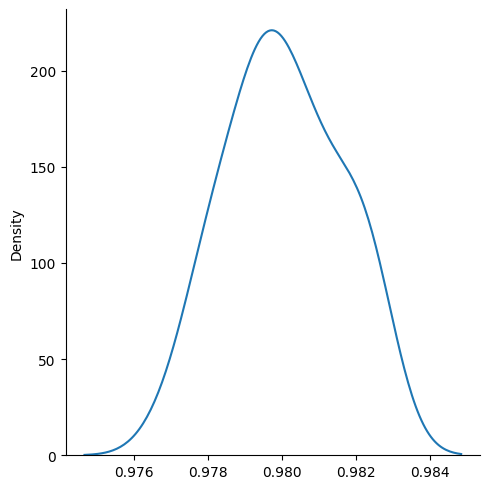

In [32]:
sns.displot(resultados_knn, kind = 'kde');

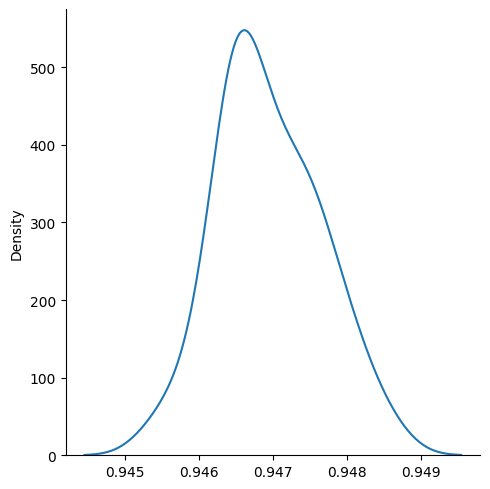

In [33]:
sns.displot(resultados_logistica, kind = 'kde');

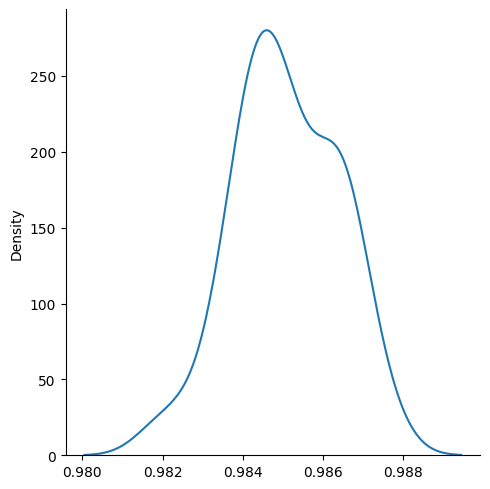

In [34]:
sns.displot(resultados_svm, kind = 'kde');

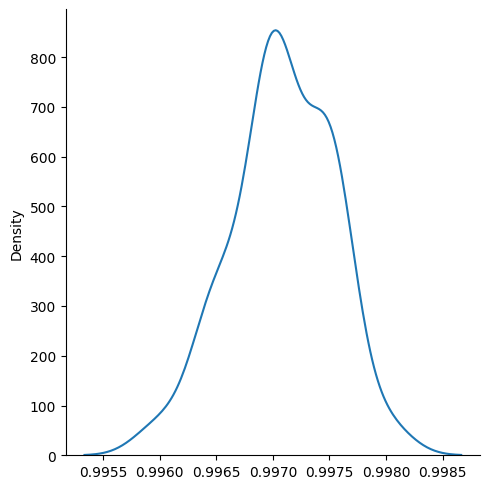

In [35]:
sns.displot(resultados_rede_neural, kind = 'kde');

In [36]:
from scipy.stats import f_oneway

In [39]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_logistica, resultados_knn, resultados_svm, resultados_rede_neural)
p

5.19619639460235e-185

In [40]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes')
else:
    print('Hipotese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [41]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_logistica, resultados_knn, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                       'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                       'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                       'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                       'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                       'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                       'random_forest', 'random_forest','random_forest','random_forest','random_forest',
                                       'random_forest', 'random_forest','random_forest','random_forest','random_forest',
                                       'random_forest', 'random_forest','random_forest','random_forest','random_forest',
                                       'random_forest', 'random_forest','random_forest','random_forest','random_forest',
                                       'random_forest', 'random_forest','random_forest','random_forest','random_forest',
                                       'random_forest', 'random_forest','random_forest','random_forest','random_forest',
                                       'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 
                                       'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 
                                       'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 
                                       'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 
                                       'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 
                                       'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 
                                        'knn', 'knn', 'knn', 'knn', 'knn',                                     
                                        'knn', 'knn', 'knn', 'knn', 'knn',                                     
                                        'knn', 'knn', 'knn', 'knn', 'knn',                                     
                                        'knn', 'knn', 'knn', 'knn', 'knn',                                     
                                        'knn', 'knn', 'knn', 'knn', 'knn',                                     
                                        'knn', 'knn', 'knn', 'knn', 'knn', 
                                        'svm', 'svm', 'svm', 'svm', 'svm',
                                        'svm', 'svm', 'svm', 'svm', 'svm',
                                        'svm', 'svm', 'svm', 'svm', 'svm',
                                        'svm', 'svm', 'svm', 'svm', 'svm',
                                        'svm', 'svm', 'svm', 'svm', 'svm',
                                        'svm', 'svm', 'svm', 'svm', 'svm',
                                        'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 
                                        'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 
                                        'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 
                                        'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 
                                        'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 
                                        'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural']}

In [47]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9860,arvore
1,0.9845,arvore
2,0.9905,arvore
3,0.9875,arvore
4,0.9880,arvore
...,...,...
175,0.9975,rede_neural
176,0.9965,rede_neural
177,0.9970,rede_neural
178,0.9970,rede_neural


In [48]:
from statsmodels.stats.multicomp import MultiComparison

In [51]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0071    0.0 -0.0081 -0.0061   True
       arvore     logistica  -0.0402    0.0 -0.0412 -0.0392   True
       arvore random_forest  -0.0029    0.0 -0.0039 -0.0018   True
       arvore   rede_neural   0.0099    0.0  0.0089  0.0109   True
       arvore           svm  -0.0021    0.0 -0.0031 -0.0011   True
          knn     logistica  -0.0331    0.0 -0.0341 -0.0321   True
          knn random_forest   0.0043    0.0  0.0033  0.0053   True
          knn   rede_neural    0.017    0.0   0.016   0.018   True
          knn           svm    0.005    0.0   0.004   0.006   True
    logistica random_forest   0.0374    0.0  0.0364  0.0384   True
    logistica   rede_neural   0.0501    0.0  0.0491  0.0511   True
    logistica           svm   0.0381    0.0  0.0371  0.0391   

In [52]:
resultados.mean()

Arvore           0.987167
Random Forest    0.984317
KNN              0.980050
Logistica        0.946950
SVM              0.985083
Rede neural      0.997083
dtype: float64

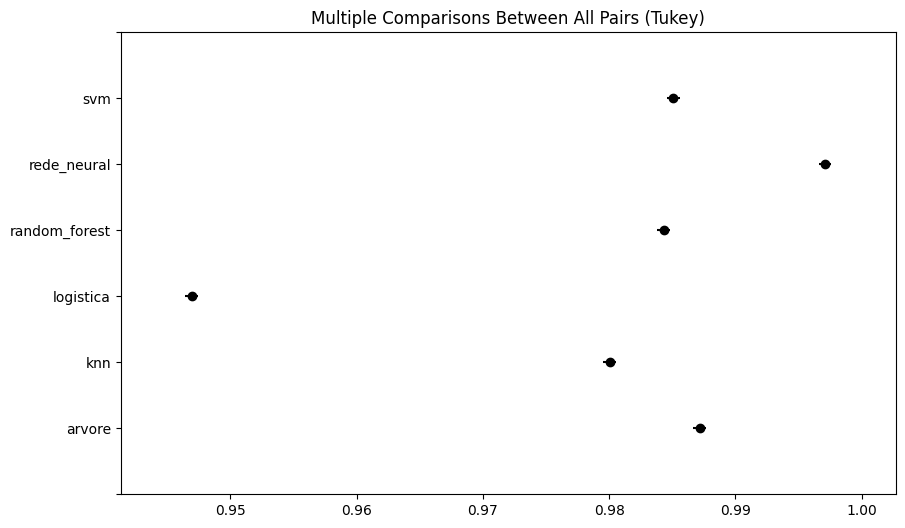

In [53]:
teste_estatistico.plot_simultaneous();

## Salvar um classificador

In [54]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
classificador_rede_neural.fit(x_credit, y_credit)

c:\Programming\Python\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [55]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(x_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [67]:
classificador_svm = SVC(C=2.0, kernel='rbf')
classificador_svm.fit(x_credit, y_credit)

SVC(C=2.0)

In [68]:
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

## Carregar algoritmos

In [69]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [75]:
novo_registro = x_credit[1999]
novo_registro.shape

(3,)

In [76]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 3)

In [77]:
rede_neural.predict(novo_registro)

array([1], dtype=int64)

In [78]:
arvore.predict(novo_registro)

array([1], dtype=int64)

In [79]:
svm.predict(novo_registro)

array([1], dtype=int64)